## 1. Vamos a cargar los datos y a analizarlos

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_original = pd.read_csv('../data/raw/houses_valencia.csv')

In [24]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33622 entries, 0 to 33621
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          33622 non-null  int64  
 1   ID                  33622 non-null  object 
 2   Precio              33622 non-null  float64
 3   Preciom2            33622 non-null  float64
 4   Metros_Construidos  33622 non-null  int64  
 5   Habitaciones        33622 non-null  int64  
 6   Baños               33622 non-null  int64  
 7   Terraza             33622 non-null  object 
 8   Ascensor            33622 non-null  object 
 9   Aire_Acondicionado  33622 non-null  object 
 10  Servicios           33622 non-null  int64  
 11  Garaje              33622 non-null  object 
 12  Garaje_en_Precio    33622 non-null  object 
 13  Precio_garaje       33622 non-null  float64
 14  Trastero            33622 non-null  object 
 15  Armarios            33622 non-null  object 
 16  Pisc

In [25]:
df_original.columns

Index(['Unnamed: 0', 'ID', 'Precio', 'Preciom2', 'Metros_Construidos',
       'Habitaciones', 'Baños', 'Terraza', 'Ascensor', 'Aire_Acondicionado',
       'Servicios', 'Garaje', 'Garaje_en_Precio', 'Precio_garaje', 'Trastero',
       'Armarios', 'Piscina', 'Conserje', 'Jardín', 'Duplex', 'Estudio',
       'Ático', 'Año_construcción', 'Calidad_suelo', 'Año_diseñado',
       'Plantas_máximas', 'Número_viviendas', 'Calidad_catastral',
       'Distancia_centro', 'Distancia_metro', 'Distancia_Blasco', 'Latitud',
       'Longitud', 'Orientación'],
      dtype='object')

In [26]:
df = df_original.copy()
df = df.drop(columns=["ID", "Unnamed: 0", "Año_diseñado", "Garaje_en_Precio", "Precio_garaje"])

In [27]:
df.head().transpose()

,0,1,2,3,4
Precio,111000.0,169000.0,162000.0,199000.0,73000.0
Preciom2,1480.0,1320.31,1883.72,1792.79,1303.57
Metros_Construidos,75,128,86,111,56
Habitaciones,2,4,2,4,3
Baños,1,2,1,2,1
Terraza,Si,No,No,No,Si
Ascensor,Si,Si,Si,Si,Si
Aire_Acondicionado,Si,Si,Si,No,No
Servicios,2,3,3,3,3
Garaje,Si,Si,No,No,No


In [28]:
df.describe()

,Precio,Preciom2,Metros_Construidos,Habitaciones,Baños,Servicios,Año_construcción,Calidad_suelo,Plantas_máximas,Número_viviendas,Calidad_catastral,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud
count,3.362200e+04,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000,33622.000000
mean,1.996783e+05,1714.535686,108.945780,3.065761,1.585688,2.779847,1969.560169,3.421034,7.042502,36.830647,5.337577,2.092694,0.644774,2.065233,39.471631,-0.375288
std,1.771560e+05,850.807252,47.285144,1.085742,0.642585,0.534646,46.182955,2.440414,2.889755,45.107082,1.580593,0.969574,0.419772,1.085123,0.014052,0.019529
min,2.000000e+04,480.690000,24.000000,0.000000,0.000000,1.000000,11.000000,-1.000000,0.000000,1.000000,0.000000,0.003053,0.003744,0.001828,39.438269,-0.420701
25%,9.900000e+04,1112.500000,80.000000,3.000000,1.000000,3.000000,1964.000000,1.000000,5.000000,12.000000,4.000000,1.363046,0.329513,1.218373,39.461678,-0.389691
50%,1.510000e+05,1531.250000,100.000000,3.000000,2.000000,3.000000,1970.000000,3.000000,7.000000,22.000000,5.000000,2.124726,0.538083,2.006919,39.469803,-0.377498
75%,2.340000e+05,2114.290000,123.000000,4.000000,2.000000,3.000000,1980.000000,5.000000,8.000000,43.000000,7.000000,2.765479,0.874896,2.840189,39.483848,-0.365326
max,2.772000e+06,9421.820000,912.000000,81.000000,12.000000,3.000000,2020.000000,11.000000,33.000000,556.000000,9.000000,5.666819,2.859185,5.019537,39.503675,-0.320134


## 2. Convertir columnas categóricas

In [29]:
df['Terraza'] = df['Terraza'].map({'Si': 1, 'No': 0})
df['Ascensor'] = df['Ascensor'].map({'Si': 1, 'No': 0})
df['Aire_Acondicionado'] = df['Aire_Acondicionado'].map({'Si': 1, 'No': 0})
df['Garaje'] = df['Garaje'].map({'Si': 1, 'No': 0})
df['Trastero'] = df['Trastero'].map({'Si': 1, 'No': 0})
df['Armarios'] = df['Armarios'].map({'Si': 1, 'No': 0})
df['Piscina'] = df['Piscina'].map({'Si': 1, 'No': 0})
df['Conserje'] = df['Conserje'].map({'Si': 1, 'No': 0})
df['Jardín'] = df['Jardín'].map({'Si': 1, 'No': 0})
df['Duplex'] = df['Duplex'].map({'Si': 1, 'No': 0})
df['Estudio'] = df['Estudio'].map({'Si': 1, 'No': 0})
df['Ático'] = df['Ático'].map({'Si': 1, 'No': 0})
df

,Precio,Preciom2,Metros_Construidos,Habitaciones,Baños,Terraza,Ascensor,Aire_Acondicionado,Servicios,Garaje,...,Calidad_suelo,Plantas_máximas,Número_viviendas,Calidad_catastral,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud,Orientación
0,111000.0,1480.00,75,2,1,1,1,1,2,1,...,6,7,35,6,3.759093,0.756517,3.373132,39.500908,-0.393538,Sur
1,169000.0,1320.31,128,4,2,0,1,1,3,1,...,3,7,56,5,2.073773,0.370680,0.540594,39.482599,-0.359125,Sur
2,162000.0,1883.72,86,2,1,0,1,1,3,0,...,4,6,20,4,2.099641,0.038560,0.719203,39.485144,-0.362470,Sur
3,199000.0,1792.79,111,4,2,0,1,0,3,0,...,4,8,25,5,2.120917,0.524827,0.915379,39.487445,-0.367417,Desconocida
4,73000.0,1303.57,56,3,1,1,1,0,3,0,...,4,6,20,8,3.087950,1.129985,2.009535,39.497057,-0.370182,Desconocida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,121000.0,1008.33,120,3,2,0,1,1,3,0,...,2,4,13,5,2.800362,0.710564,2.607601,39.492210,-0.391340,Sur
33618,136000.0,1619.05,84,2,1,1,1,1,3,0,...,4,6,49,7,2.282765,0.321158,2.404973,39.486174,-0.392554,Este
33619,98000.0,867.26,113,2,2,1,0,0,3,0,...,2,6,17,7,2.583955,0.661318,2.510628,39.489754,-0.391909,Desconocida
33620,45000.0,661.76,68,3,1,0,0,0,3,0,...,1,6,41,7,3.420772,0.529830,3.305286,39.495606,-0.398167,Desconocida


In [30]:
df.head().transpose()

,0,1,2,3,4
Precio,111000.0,169000.0,162000.0,199000.0,73000.0
Preciom2,1480.0,1320.31,1883.72,1792.79,1303.57
Metros_Construidos,75,128,86,111,56
Habitaciones,2,4,2,4,3
Baños,1,2,1,2,1
Terraza,1,0,0,0,1
Ascensor,1,1,1,1,1
Aire_Acondicionado,1,1,1,0,0
Servicios,2,3,3,3,3
Garaje,1,1,0,0,0


In [31]:
orien_desc = (df['Orientación'] == 'Desconocida').sum()
print(orien_desc)

17472


In [32]:
# Convertir orientación a variables dummy

df = pd.get_dummies(df, columns=["Orientación"], drop_first=True, dtype=np.int64)


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Precio,33622.0,199678.305871,177156.031837,20000.000000,99000.000000,151000.000000,234000.000000,2.772000e+06
Preciom2,33622.0,1714.535686,850.807252,480.690000,1112.500000,1531.250000,2114.290000,9.421820e+03
Metros_Construidos,33622.0,108.945780,47.285144,24.000000,80.000000,100.000000,123.000000,9.120000e+02
Habitaciones,33622.0,3.065761,1.085742,0.000000,3.000000,3.000000,4.000000,8.100000e+01
Baños,33622.0,1.585688,0.642585,0.000000,1.000000,2.000000,2.000000,1.200000e+01
Terraza,33622.0,0.254714,0.435707,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Ascensor,33622.0,0.790732,0.406792,0.000000,1.000000,1.000000,1.000000,1.000000e+00
Aire_Acondicionado,33622.0,0.471447,0.499191,0.000000,0.000000,0.000000,1.000000,1.000000e+00
Servicios,33622.0,2.779847,0.534646,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Garaje,33622.0,0.168580,0.374386,0.000000,0.000000,0.000000,0.000000,1.000000e+00


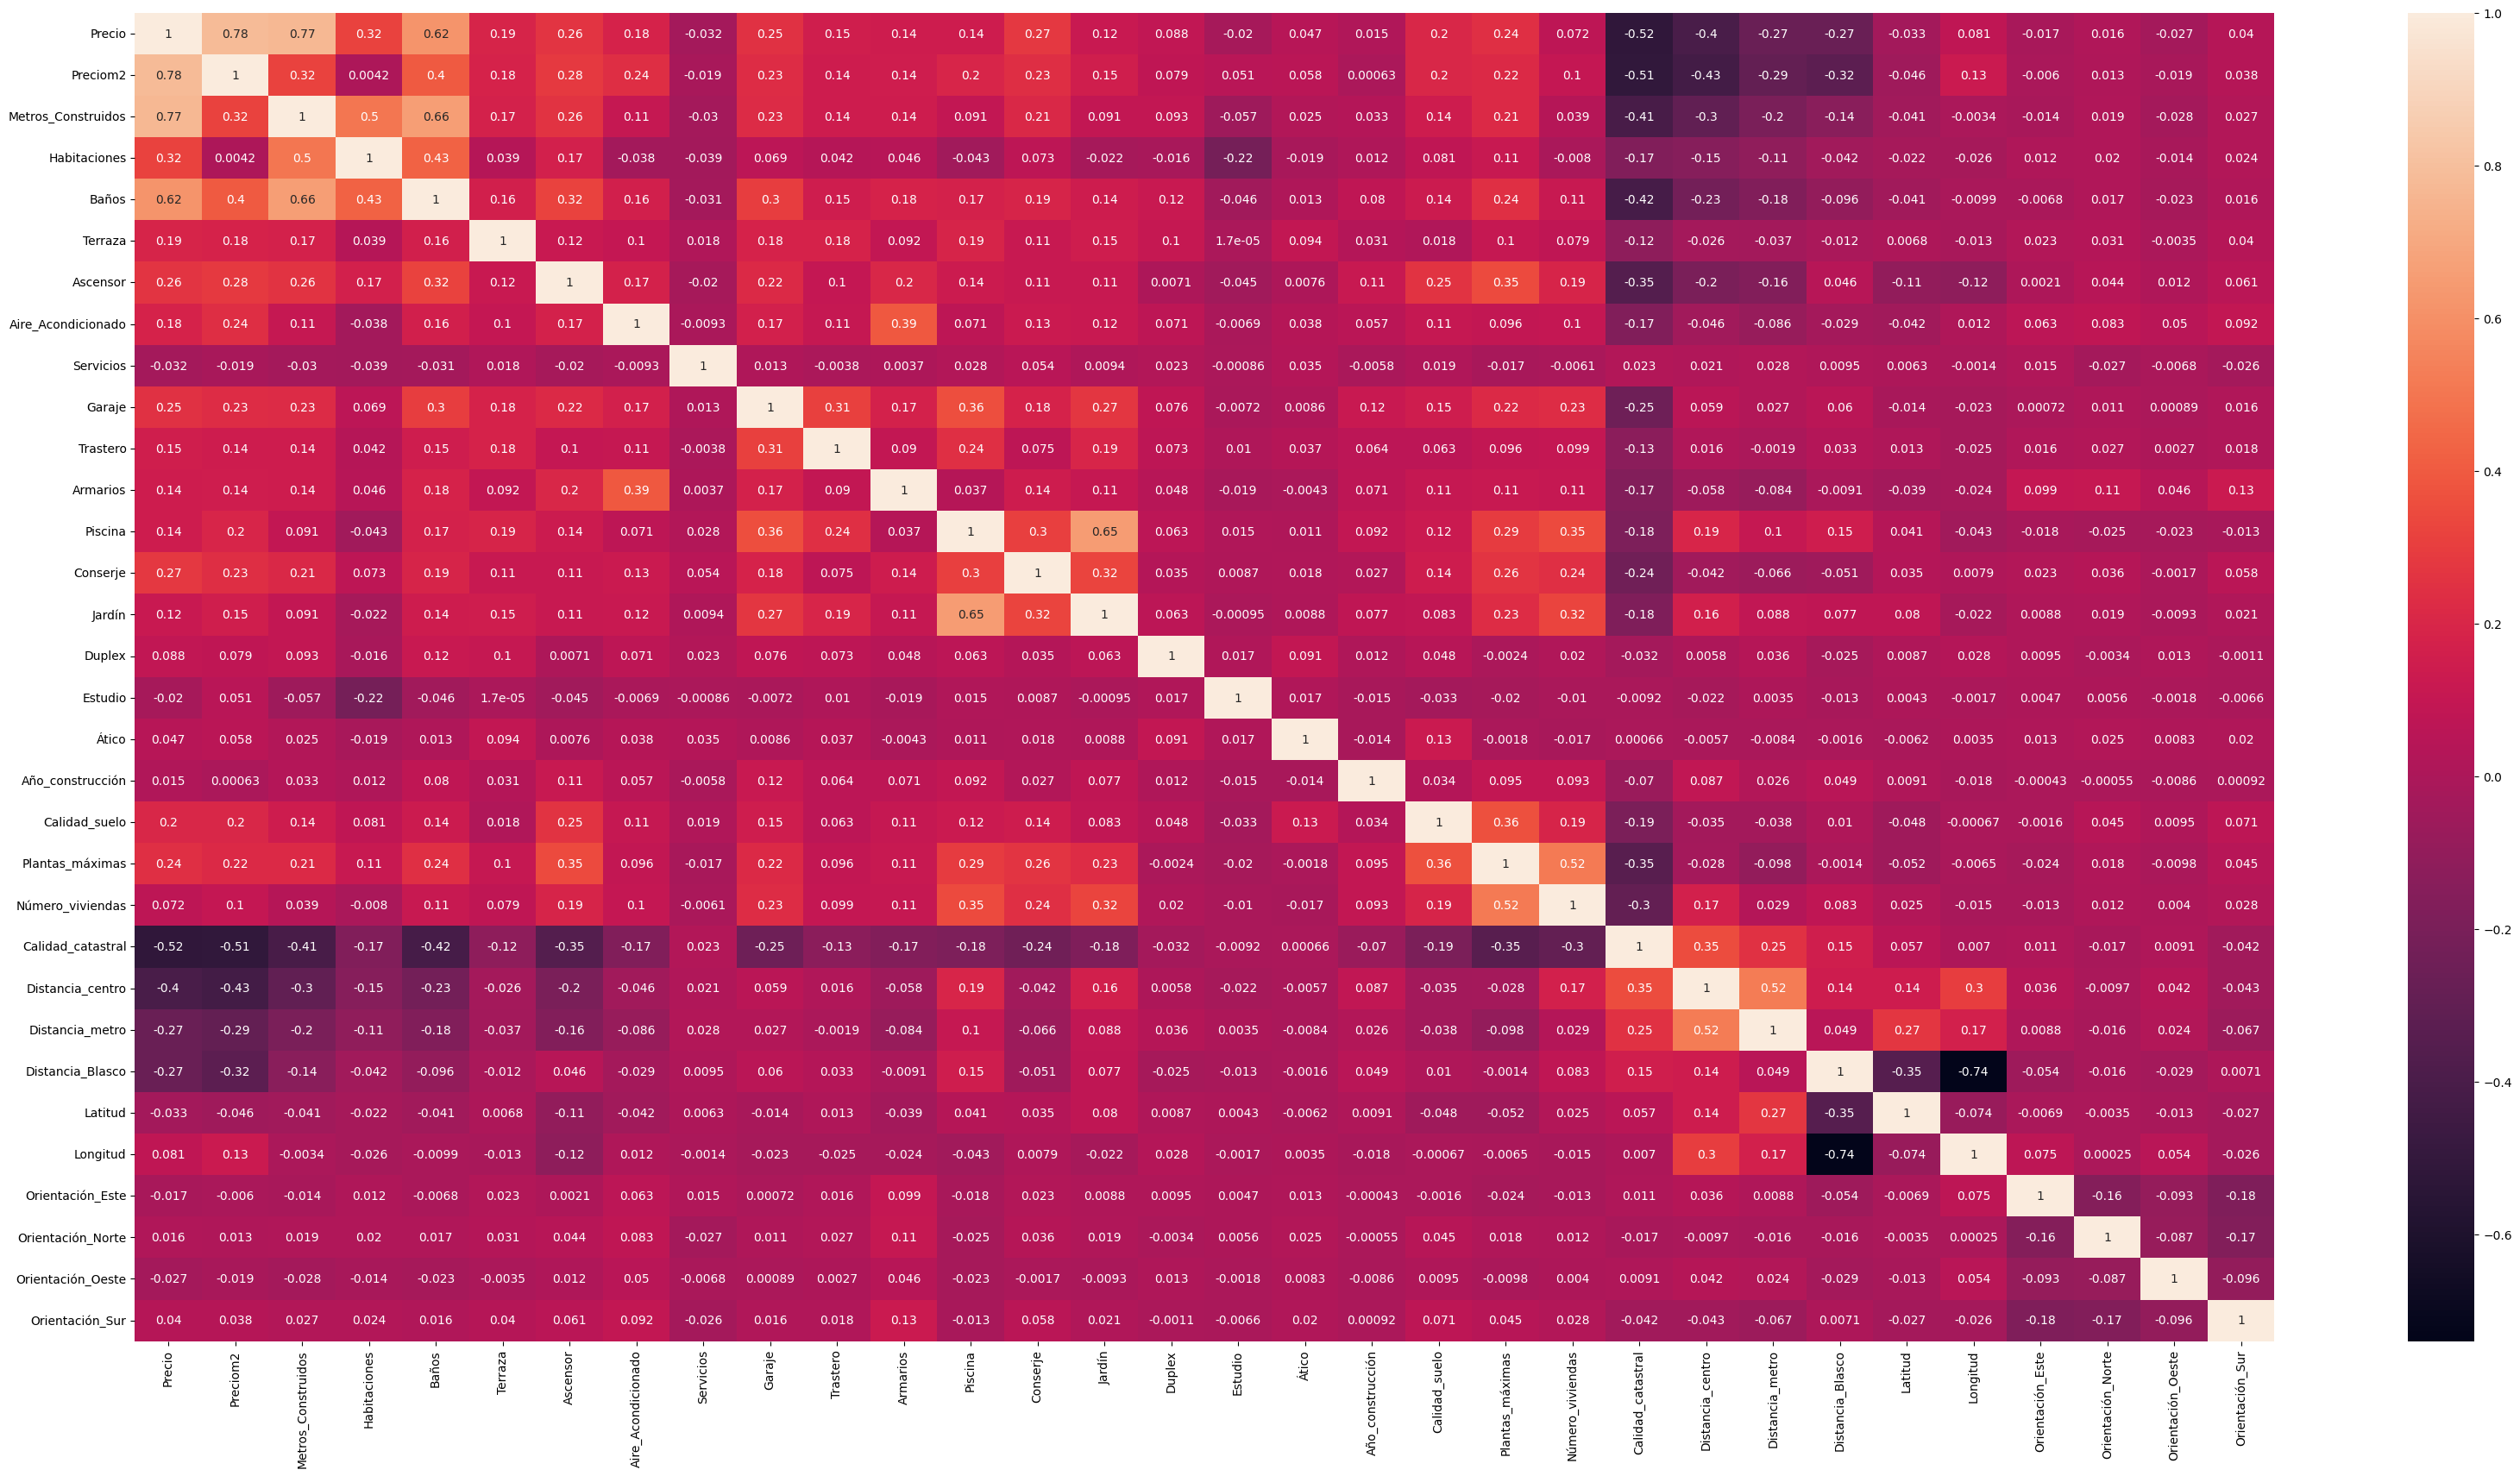

In [35]:

plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), annot=True);

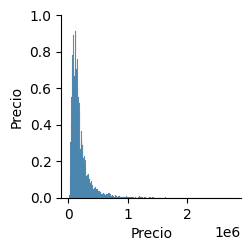

In [36]:
sns.pairplot(df[["Precio"]])

In [37]:
# Ordenar el DataFrame por la columna 'Precio' de mayor a menor
df_sorted = df.sort_values(by='Precio', ascending=False)

# Imprimir el DataFrame ordenado
print(df_sorted)

          Precio  Preciom2  Metros_Construidos  Habitaciones  Baños  Terraza  \
4789   2772000.0   9333.33                 297             4      4        1   
4699   2591000.0   9421.82                 275             4      5        0   
4763   2546000.0   7111.73                 358             4      2        0   
4721   2522000.0   7331.40                 344             4      4        1   
4788   2517000.0   6292.50                 400             6      4        1   
...          ...       ...                 ...           ...    ...      ...   
14409    25000.0    531.91                  47             3      1        0   
15       24000.0    533.33                  45             2      1        0   
5521     24000.0    521.74                  46             2      1        0   
28269    24000.0    521.74                  46             2      1        0   
31518    20000.0    487.80                  41             0      1        0   

       Ascensor  Aire_Acondicionado  Se

## 4. exploratory data analisys

In [38]:
print(df.describe())


             Precio      Preciom2  Metros_Construidos  Habitaciones  \
count  3.362200e+04  33622.000000        33622.000000  33622.000000   
mean   1.996783e+05   1714.535686          108.945780      3.065761   
std    1.771560e+05    850.807252           47.285144      1.085742   
min    2.000000e+04    480.690000           24.000000      0.000000   
25%    9.900000e+04   1112.500000           80.000000      3.000000   
50%    1.510000e+05   1531.250000          100.000000      3.000000   
75%    2.340000e+05   2114.290000          123.000000      4.000000   
max    2.772000e+06   9421.820000          912.000000     81.000000   

              Baños       Terraza      Ascensor  Aire_Acondicionado  \
count  33622.000000  33622.000000  33622.000000        33622.000000   
mean       1.585688      0.254714      0.790732            0.471447   
std        0.642585      0.435707      0.406792            0.499191   
min        0.000000      0.000000      0.000000            0.000000   
25%  

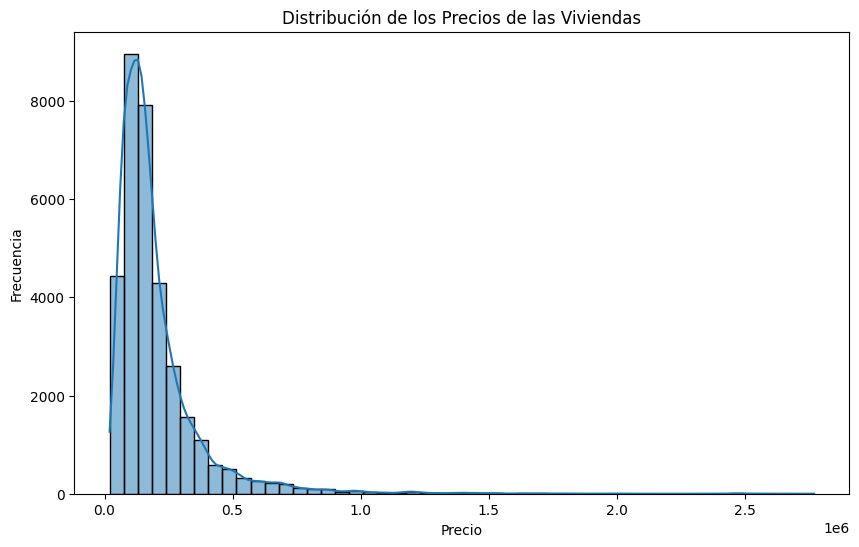

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Precio'], bins=50, kde=True)
plt.title('Distribución de los Precios de las Viviendas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

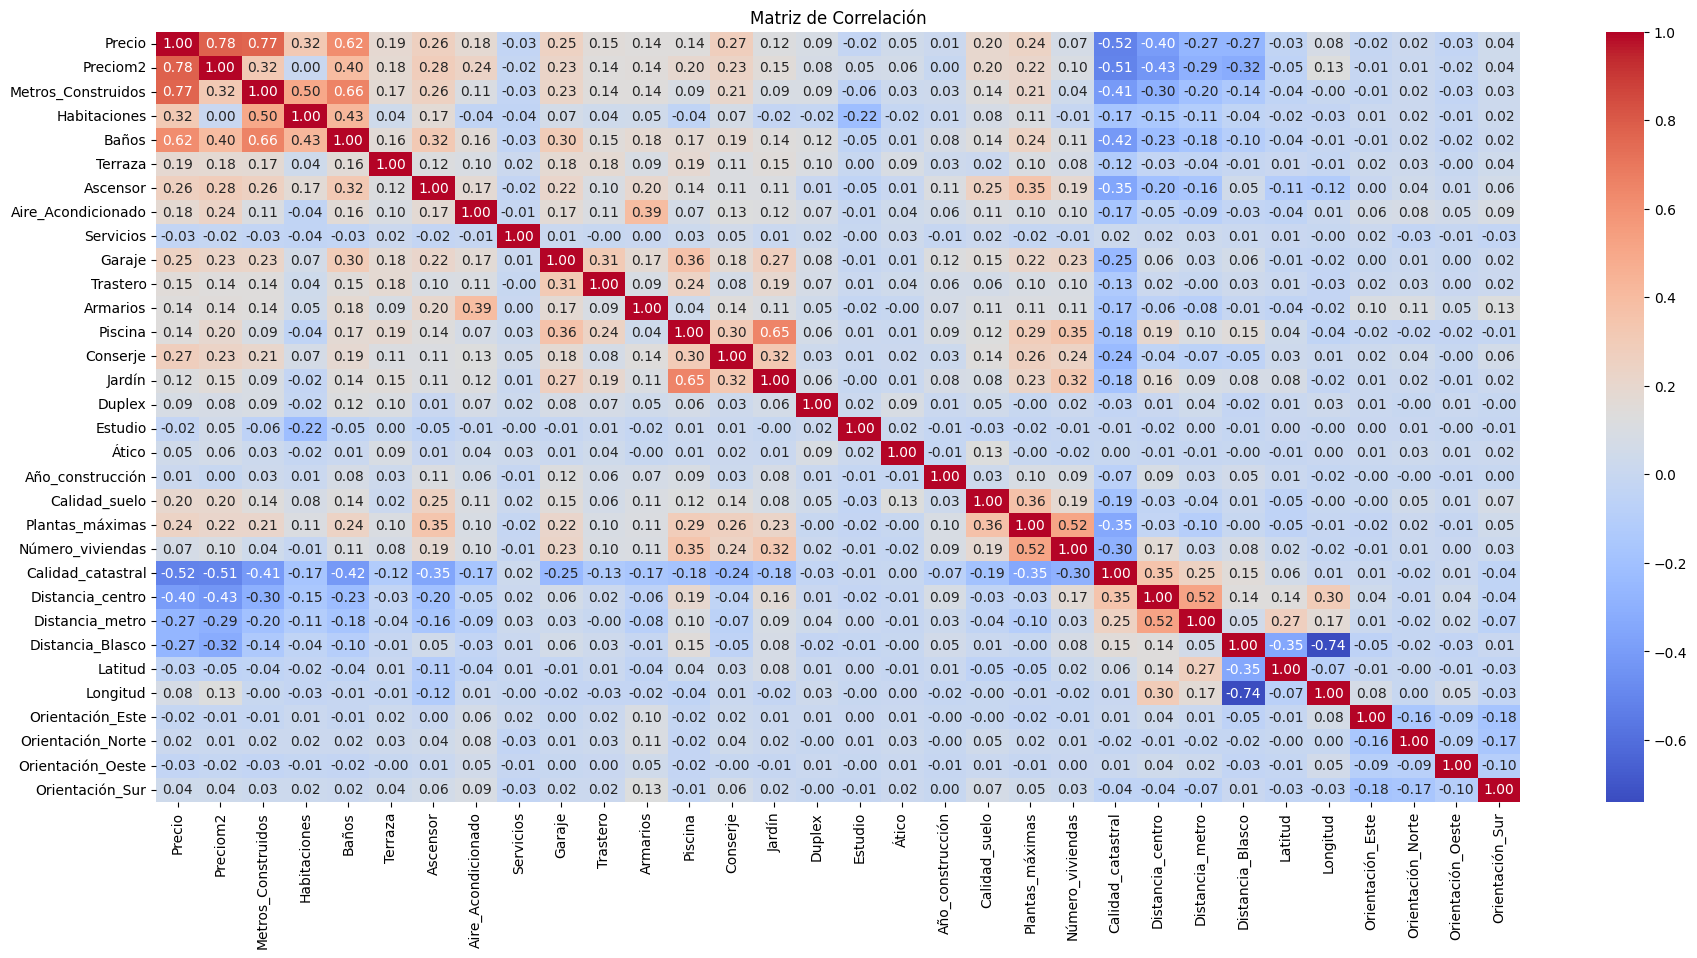

In [40]:
plt.figure(figsize=(22, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

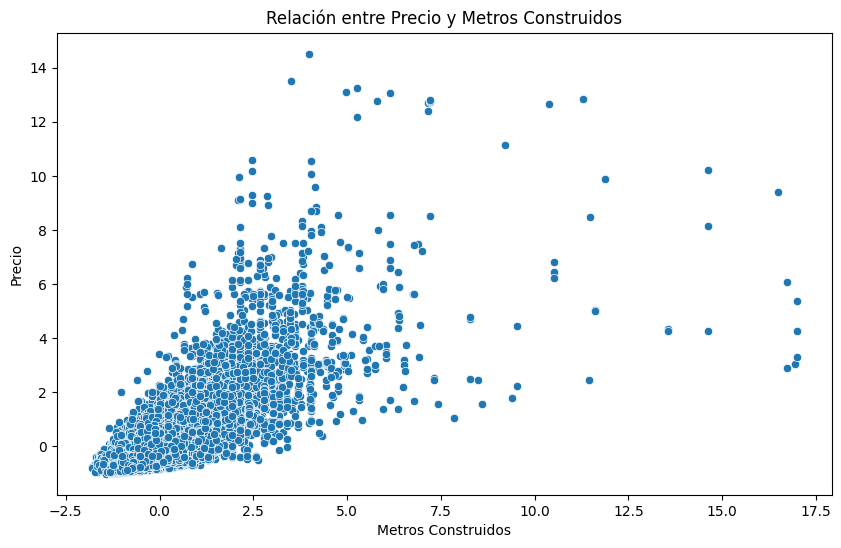

In [20]:
# Relación entre Precio y Metros Construidos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Metros_Construidos', y='Precio', data=df)
plt.title('Relación entre Precio y Metros Construidos')
plt.xlabel('Metros Construidos')
plt.ylabel('Precio')
plt.show()

## 5 Guardar los datos limpios y normalizados que utilizaremos para entrenar el modelo

In [59]:
df

,Precio,Preciom2,Metros_Construidos,Habitaciones,Baños,Terraza,Ascensor,Aire_Acondicionado,Servicios,Garaje,...,Distancia_centro,Distancia_metro,Distancia_Blasco,Latitud,Longitud,Orientación_Este,Orientación_Norte,Orientación_Oeste,Orientación_Sur,Edad
0,-0.500574,-0.275667,-0.717906,-0.981611,-0.911469,1.710546,0.514442,1.058833,-1.458645,2.220788,...,1.718718,0.266205,1.205317,2.083445,-0.934515,-0.415601,-0.386207,-0.224774,2.333388,0.142050
1,-0.173174,-0.463362,0.402970,0.860475,0.644768,-0.584609,0.514442,1.058833,0.411781,2.220788,...,-0.019515,-0.652970,-1.405059,0.780556,0.827677,-0.415601,-0.386207,-0.224774,2.333388,-0.139444
2,-0.212687,0.198854,-0.485271,-0.981611,-0.911469,-0.584609,0.514442,1.058833,0.411781,-0.450291,...,0.007166,-1.444173,-1.240459,0.961625,0.656393,-0.415601,-0.386207,-0.224774,2.333388,-0.875657
3,-0.003829,0.091978,0.043444,0.860475,0.644768,-0.584609,0.514442,-0.944436,0.411781,-0.450291,...,0.029110,-0.285747,-1.059668,1.125397,0.403065,-0.415601,-0.386207,-0.224774,-0.428561,-0.550857
4,-0.715077,-0.483037,-1.119729,-0.060568,-0.911469,1.710546,0.514442,-0.944436,0.411781,-0.450291,...,1.026504,1.155912,-0.051329,1.809424,0.261473,-0.415601,-0.386207,-0.224774,-0.428561,0.207010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33617,-0.444125,-0.830054,0.233781,-0.060568,0.644768,-0.584609,0.514442,1.058833,0.411781,-0.450291,...,0.729887,0.156731,0.499829,1.464473,-0.821960,-0.415601,-0.386207,-0.224774,2.333388,-0.096137
33618,-0.359453,-0.112231,-0.527568,-0.981611,-0.911469,1.710546,0.514442,1.058833,0.411781,-0.450291,...,0.196039,-0.770945,0.313093,1.034947,-0.884120,2.406155,-0.386207,-0.224774,-0.428561,-0.009524
33619,-0.573956,-0.995864,0.085741,-0.981611,0.644768,1.710546,-1.943854,-0.944436,0.411781,-0.450291,...,0.506685,0.039413,0.410462,1.289718,-0.851072,-0.415601,-0.386207,-0.224774,-0.428561,-0.182750
33620,-0.873132,-1.237403,-0.865946,-0.060568,-0.911469,-0.584609,-1.943854,-0.944436,0.411781,-0.450291,...,1.369775,-0.273828,1.142793,1.706163,-1.171514,-0.415601,-0.386207,-0.224774,-0.428561,0.098743


In [41]:
df.to_csv('../data/processed/valencia_norm.csv', index=False)